In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress
import plotly.express as px
#import mplcursors
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Study data files"
LA_Crime = "static/data/Crime_Data_from_2020_to_Present_20240611.csv"


#Read the data
crime_data= pd.read_csv(LA_Crime)
crime_data



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947770,242106032,2/20/2024 0:00,2/17/2024 0:00,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
947771,242004546,1/16/2024 0:00,1/16/2024 0:00,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
947772,240104953,1/15/2024 0:00,1/15/2024 0:00,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
947773,240309674,4/24/2024 0:00,4/24/2024 0:00,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [6]:
# # Sample DataFrame with a 'date_column' containing dates
# data = {'date_column': ['2024-06-16', '2023-12-25', '2022-04-30']}
# df = pd.DataFrame(data)

# Convert 'date_column' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract month name, day name, and year into separate columns
crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month OCC'] = crime_data['DATE OCC'].dt.month_name()
crime_data['Day OCC'] = crime_data['DATE OCC'].dt.day_name()


# Display the updated DataFrame
crime_data.head()
# print(crime_data)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month OCC,Day OCC
0,190326475,3/1/2020 0:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,March,Sunday
1,200106753,2/9/2020 0:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,February,Saturday
2,200320258,11/11/2020 0:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,November,Wednesday
3,200907217,5/10/2023 0:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,March,Tuesday
4,220614831,8/18/2022 0:00,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,2020,August,Monday


In [7]:

# Reorder columns to chow year month occ and Day occ
crime_data = crime_data[['DR_NO','Date Rptd','DATE OCC','Year','Month OCC','Day OCC','TIME OCC','AREA','AREA NAME',
'Rpt Dist No','Part 1-2','Crm Cd','Crm Cd Desc','Mocodes','Vict Age','Vict Sex',
'Vict Descent','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Desc','Status',
'Status Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','LOCATION','Cross Street','LAT','LON']]


# Display the updated DataFrame
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,Year,Month OCC,Day OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,2020-03-01,2020,March,Sunday,2130,7,Wilshire,784,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2020-02-08,2020,February,Saturday,1800,1,Central,182,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,2020-11-04,2020,November,Wednesday,1700,3,Southwest,356,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,2020-03-10,2020,March,Tuesday,2037,9,Van Nuys,964,...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,2020-08-17,2020,August,Monday,1200,6,Hollywood,666,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


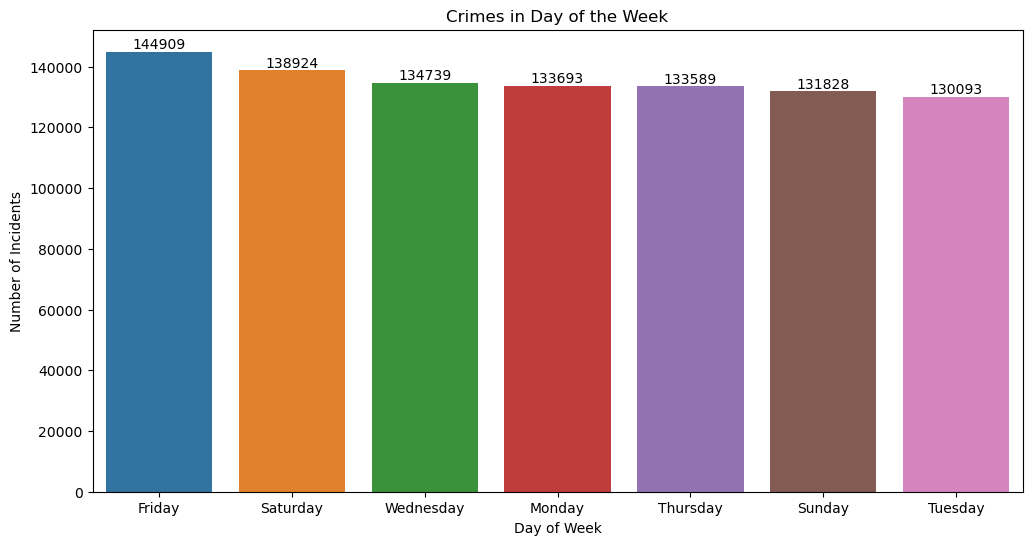

In [8]:
Daily_crime = crime_data.groupby('Day OCC').size().reset_index(name='counts')
sorted_Daily_crime = Daily_crime.sort_values(by='counts', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_Daily_crime, x='Day OCC', y='counts')
for i in ax.containers:
    ax.bar_label(i)
    
plt.title('Crimes in Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.show()

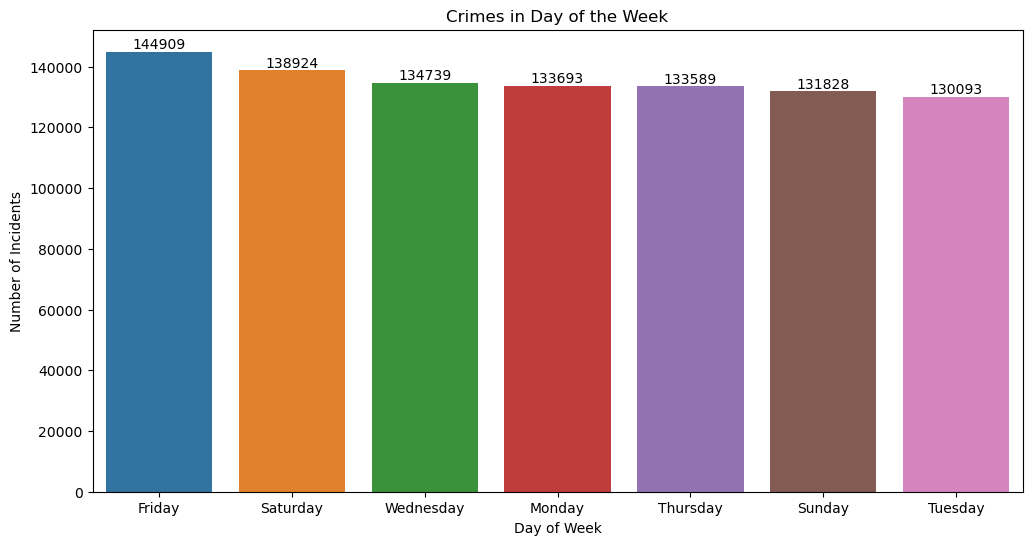

In [9]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_Daily_crime, x='Day OCC', y='counts')
for i in ax.containers:
    ax.bar_label(i)
    
plt.title('Crimes in Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.show()

In [10]:
# Group crime data by Month by crime 
Monthly_crime = crime_data.groupby(["Month OCC", "Crm Cd Desc"]).size().reset_index(name='Crime_Count')
Monthly_crime

,Month OCC,Crm Cd Desc,Crime_Count
0,April,ARSON,217
1,April,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,78
2,April,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",4470
3,April,ATTEMPTED ROBBERY,421
4,April,BATTERY - SIMPLE ASSAULT,6318
...,...,...,...
1482,September,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",166
1483,September,VIOLATION OF COURT ORDER,502
1484,September,VIOLATION OF RESTRAINING ORDER,926
1485,September,VIOLATION OF TEMPORARY RESTRAINING ORDER,70


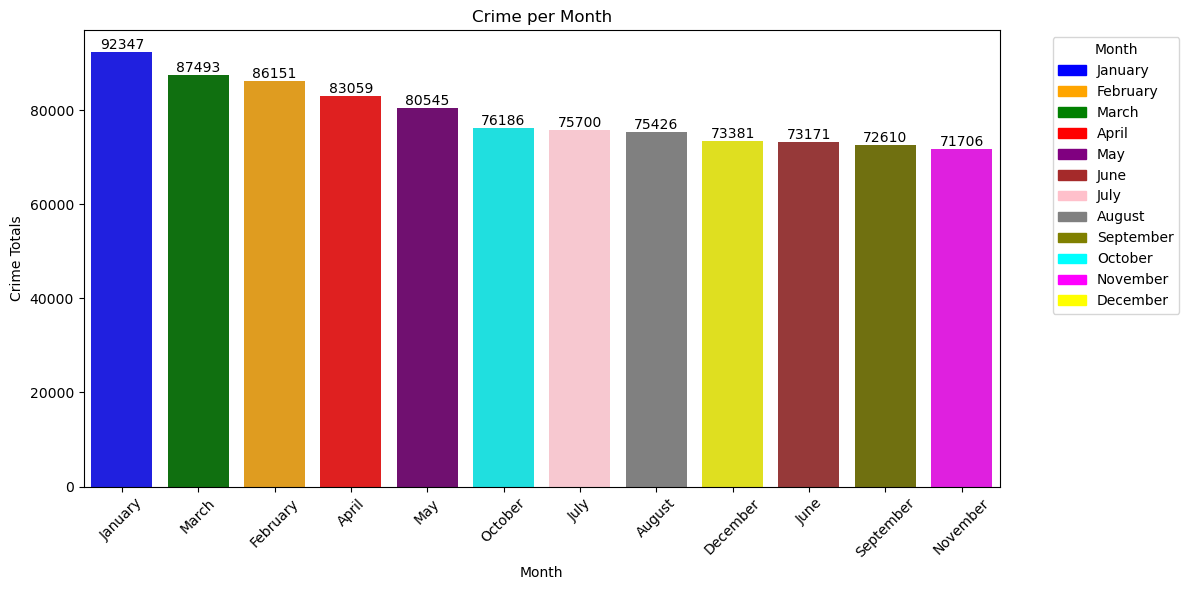

In [11]:
Monthly_crime = crime_data.groupby('Month OCC').size().reset_index(name='counts')
sorted_Monthly_crime = Monthly_crime.sort_values(by='counts', ascending=False)

# Define color mapping
month_color_mapping = {
    'January': 'blue',
    'February': 'orange',
    'March': 'green',
    'April': 'red',
    'May': 'purple',
    'June': 'brown',
    'July': 'pink',
    'August': 'grey',
    'September': 'olive',
    'October': 'cyan',
    'November': 'magenta',
    'December': 'yellow'
}

# Assigning colors based on the month
sorted_Monthly_crime['color'] = sorted_Monthly_crime['Month OCC'].map(month_color_mapping)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_Monthly_crime, x='Month OCC', y='counts', palette=sorted_Monthly_crime['color'])

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Crime per Month')
plt.xlabel('Month')
plt.ylabel('Crime Totals')
plt.xticks(rotation=45)


# Create custom legend patches
legend_patches = [mpatches.Patch(color=color, label=month) for month, color in month_color_mapping.items()]
# Display legend outside the plot
plt.legend(handles=legend_patches, title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('Crime_Per_Month.jpeg')
plt.show()

In [12]:
#analysis of crime per season

crime_Season_data = pd.DataFrame(Monthly_crime)

#Define seasons
seasons = {
    'January':'Winter','February':"Winter",'March':"Spring",
    'April':"Spring", 'May':"Spring",'June':"Summer",
    'July':"Summer",'August':"Summer", 'September':"Fall",
    'October':"Fall",'November':"Fall", 'December':"Winter"
    
}

# Map each month to a season
crime_Season_data['Season'] = Monthly_crime['Month OCC'].map(seasons)
crime_Season_data
 


,Month OCC,counts,Season
0,April,83059,Spring
1,August,75426,Summer
2,December,73381,Winter
3,February,86151,Winter
4,January,92347,Winter
5,July,75700,Summer
6,June,73171,Summer
7,March,87493,Spring
8,May,80545,Spring
9,November,71706,Fall


In [13]:

#Toal Crime per Season 
crimes_by_season = crime_Season_data.groupby('Season')['counts'].sum().reset_index()
crimes_by_season


,Season,counts
0,Fall,220502
1,Spring,251097
2,Summer,224297
3,Winter,251879


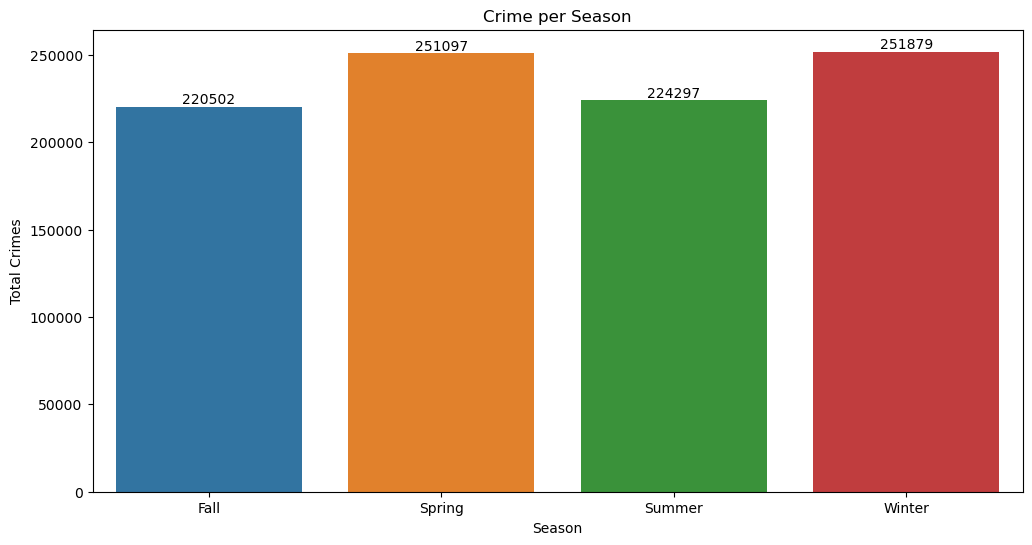

In [14]:
# Seasonal Crime bar chart

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=crimes_by_season, x='Season', y='counts')
for i in ax.containers:
    ax.bar_label(i)
    
plt.title('Crime per Season')
plt.xlabel('Season')
plt.ylabel('Total Crimes')
plt.savefig('Crime per Season.jpeg')
plt.show()

In [15]:
# Group crime data by Month by crime 
Daily_crime = crime_data.groupby(["Day OCC", "Crm Cd Desc"]).size().reset_index(name='Crime_Count')
Daily_crime

,Day OCC,Crm Cd Desc,Crime_Count
0,Friday,ARSON,360
1,Friday,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,170
2,Friday,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",7644
3,Friday,ATTEMPTED ROBBERY,683
4,Friday,BATTERY - SIMPLE ASSAULT,10951
...,...,...,...
899,Wednesday,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",332
900,Wednesday,VIOLATION OF COURT ORDER,954
901,Wednesday,VIOLATION OF RESTRAINING ORDER,1658
902,Wednesday,VIOLATION OF TEMPORARY RESTRAINING ORDER,146


In [16]:
# group the crime data by Year by crime desceiption
year_crime = crime_data.groupby(["Year", "Crm Cd Desc"]).size().reset_index(name='Crime_Count')
year_crime



,Year,Crm Cd Desc,Crime_Count
0,2020,ARSON,665
1,2020,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,397
2,2020,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",11525
3,2020,ATTEMPTED ROBBERY,1122
4,2020,BATTERY - SIMPLE ASSAULT,16331
...,...,...,...
652,2024,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",369
653,2024,VIOLATION OF COURT ORDER,375
654,2024,VIOLATION OF RESTRAINING ORDER,769
655,2024,VIOLATION OF TEMPORARY RESTRAINING ORDER,47


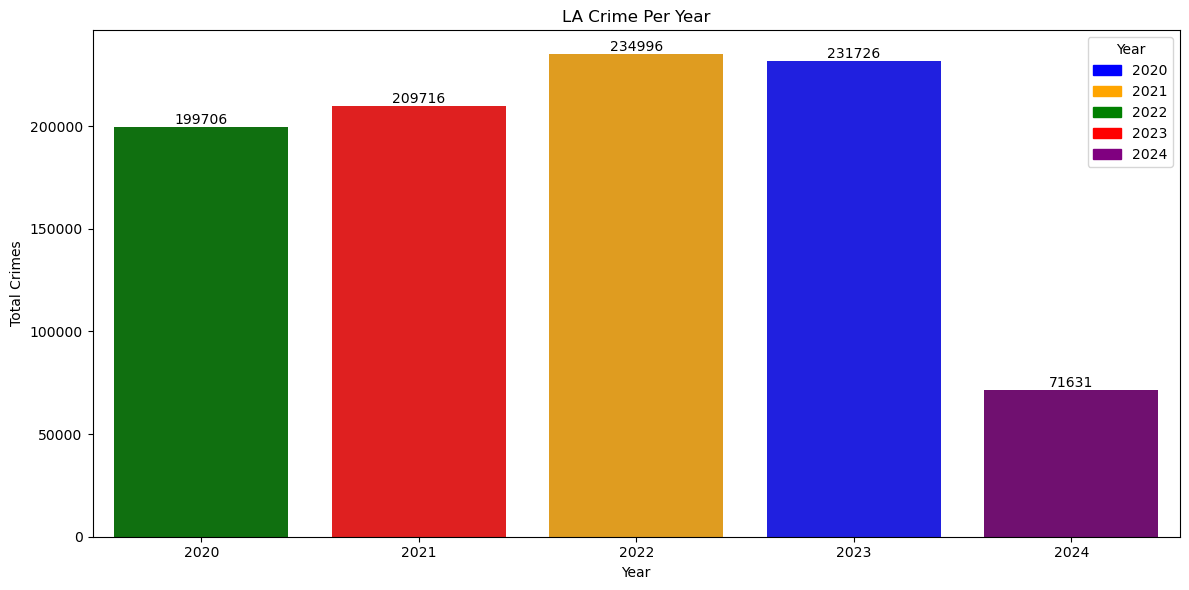

In [17]:
#bar chart showing  crime per year
year_crime = crime_data.groupby('Year').size().reset_index(name='counts')
sorted_year_crime = year_crime.sort_values(by='counts', ascending=False)

# Define color mapping
year_color_mapping = {
    2020: 'blue',
    2021: 'orange',
    2022: 'green',
    2023: 'red',
    2024: 'purple'
}

# Assigning colors based on the year
sorted_year_crime['color'] = sorted_year_crime['Year'].map(year_color_mapping)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_year_crime, x='Year', y='counts', palette=sorted_year_crime['color'])

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('LA Crime Per Year')
plt.xlabel('Year')
plt.ylabel('Total Crimes')

# Create custom legend patches
legend_patches = [mpatches.Patch(color=color, label=str(year)) for year, color in year_color_mapping.items()]

# Display legend
plt.legend(handles=legend_patches, title='Year')

plt.tight_layout()
plt.savefig('LA_Crime_Per_Year.jpeg')
plt.show()

In [18]:
#Study bin data- Data grouped by category
crime_bins = "static/data/crime_bins.csv"

#Read the data
crime_Cat= pd.read_csv(crime_bins)
crime_Cat



,Crm Cd Desc,CRIMEBIN
0,ARSON,VANDALISM
1,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,VIOLENT
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",VIOLENT
3,ATTEMPTED ROBBERY,ROBBERY
4,BATTERY - SIMPLE ASSAULT,VIOLENT
...,...,...
134,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",VEHICLE
135,VIOLATION OF COURT ORDER,fraud
136,VIOLATION OF RESTRAINING ORDER,fraud
137,VIOLATION OF TEMPORARY RESTRAINING ORDER,fraud


In [19]:
#Rename column on Crime bin table Crime to Crm Cd Desc


crime_Cat.rename(columns={'Crime': 'Crm Cd Desc'}, inplace=True)
crime_Cat

,Crm Cd Desc,CRIMEBIN
0,ARSON,VANDALISM
1,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,VIOLENT
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",VIOLENT
3,ATTEMPTED ROBBERY,ROBBERY
4,BATTERY - SIMPLE ASSAULT,VIOLENT
...,...,...
134,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",VEHICLE
135,VIOLATION OF COURT ORDER,fraud
136,VIOLATION OF RESTRAINING ORDER,fraud
137,VIOLATION OF TEMPORARY RESTRAINING ORDER,fraud


In [20]:
#Merge bins table with crime table
crime_n_cat_merged_df = crime_data.merge(crime_Cat, on='Crm Cd Desc')
crime_n_cat_merged_df.head()


# # Define the output file path
# output_file_path = 'crime_n_cat_merged_df.csv'

# # Export the DataFrame to a CSV file
# crime_n_cat_merged_df.to_csv(output_file_path, index=False)

# print(f"DataFrame saved to {output_file_path}")


,DR_NO,Date Rptd,DATE OCC,Year,Month OCC,Day OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,CRIMEBIN
0,190326475,3/1/2020 0:00,2020-03-01,2020,March,Sunday,2130,7,Wilshire,784,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,VEHICLE
1,221008844,5/6/2022 0:00,2020-11-01,2020,November,Sunday,130,10,West Valley,1029,...,Invest Cont,510.0,NaN,NaN,NaN,VALJEAN ST,VANOWEN AV,34.1939,-118.4859,VEHICLE
2,200412582,9/9/2020 0:00,2020-09-09,2020,September,Wednesday,630,4,Hollenbeck,413,...,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,VEHICLE
3,201810154,4/26/2020 0:00,2020-04-22,2020,April,Wednesday,1900,18,Southeast,1802,...,Invest Cont,510.0,NaN,NaN,NaN,90TH,WALL,33.9547,-118.2717,VEHICLE
4,231510293,5/27/2023 0:00,2020-11-24,2020,November,Tuesday,200,15,N Hollywood,1504,...,Invest Cont,510.0,NaN,NaN,NaN,7500 LAUREL CANYON BL,NaN,34.2071,-118.3965,VEHICLE


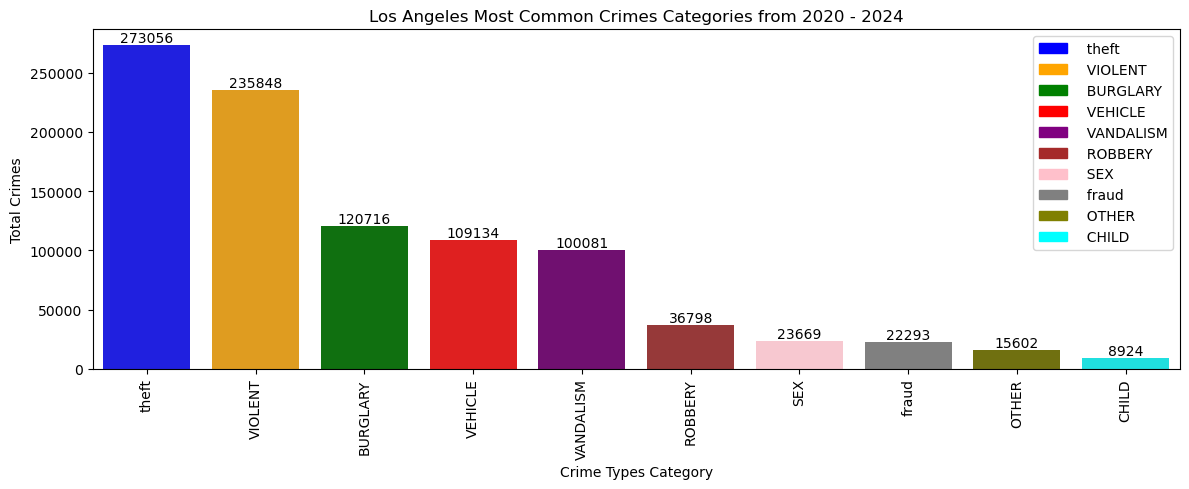

In [21]:
#Bar chart for commom crime category from 2020-2024
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Define color mapping for each offense category
CRIMEBIN_mapping = {
    'theft': 'blue',
    'VIOLENT': 'orange',
    'BURGLARY': 'green',
    'VEHICLE': 'red',
    'VANDALISM': 'purple',
    'ROBBERY': 'brown',
    'SEX': 'pink',
    'fraud': 'grey',
    'OTHER': 'olive',
    'CHILD': 'cyan'
}

# Group the crime code descriptions
crime_types = crime_n_cat_merged_df.groupby('CRIMEBIN').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

# Plot the top 10 committed crimes
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=crime_types[:10], x='CRIMEBIN', y='counts', palette=CRIMEBIN_mapping)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Los Angeles Most Common Crimes Categories from 2020 - 2024')
plt.xlabel('Crime Types Category')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)

# Create custom legend patches
legend_patches = [mpatches.Patch(color=color, label=f'  {Category}') for Category, color in CRIMEBIN_mapping.items()]

# Display legend
plt.legend(handles=legend_patches)

plt.tight_layout()
plt.savefig('LA_Most_Common_Crimes_Category.jpeg')
plt.show()


In [22]:
#crime per area
crime_area=crime_n_cat_merged_df.groupby(['AREA NAME','CRIMEBIN']).size().reset_index(name='Crime_Count')
crime_area
# # Define the output file path
# output_file_path = 'crime_area.csv'

# # Export the DataFrame to a CSV file
# crime_area.to_csv(output_file_path, index=False)

# print(f"DataFrame saved to {output_file_path}")


,AREA NAME,CRIMEBIN,Crime_Count
0,77th Street,BURGLARY,4105
1,77th Street,CHILD,813
2,77th Street,Homicide,237
3,77th Street,OTHER,1589
4,77th Street,ROBBERY,4255
...,...,...,...
226,Wilshire,VANDALISM,4831
227,Wilshire,VEHICLE,3899
228,Wilshire,VIOLENT,8698
229,Wilshire,fraud,902


<Figure size 2000x800 with 0 Axes>

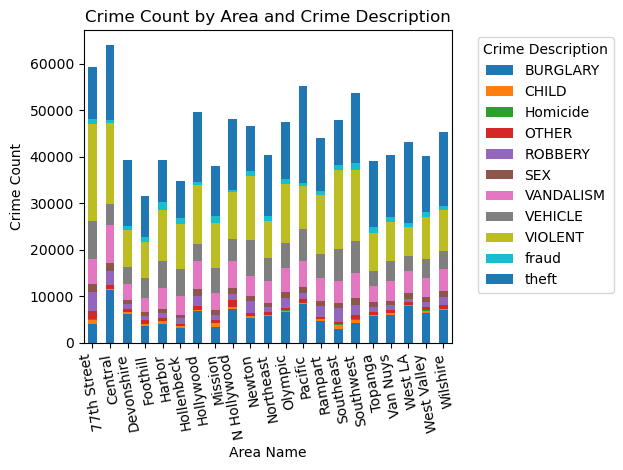

In [23]:
# Group by 'AREA NAME' and 'Crm Cd Desc' and get counts
crime_area = crime_n_cat_merged_df.groupby(['AREA NAME', 'CRIMEBIN']).size().reset_index(name='Crime_Count')

# Pivot the DataFrame to have 'Crm Cd Desc' as columns and 'AREA NAME' as index
pivot_df = crime_area.pivot(index='AREA NAME', columns='CRIMEBIN', values='Crime_Count').fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(20, 8))
pivot_df.plot(kind='bar', stacked=True)

plt.title('Crime Count by Area and Crime Description')
plt.xlabel('Area Name')
plt.ylabel('Crime Count')
plt.xticks(rotation=100)
plt.legend(title='Crime Description', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
# Save the plot as an image
plt.savefig('Crime_Count_by_Area_and_Description.png') 


plt.show()

In [24]:
data = {
    'Area Name': ['Hollywood', 'N Hollywood', 'Olympic', 'Pacific', 'West LA (Brentwood)', 'West LA', 'West LA (Century City)', 'Wilshire',
                  '77th Street', 'Central', 'Devonshire', 'Foothill', 'Harbor', 'Hollenbeck', 'Mission', 
                  'Newton', 'Northwest', 'Compton', 'Southeast', 'Southwest', 'Topanga','Van Nuys'],
    'Population': [90000, 87000, 120000, 28000, 35000, 50000, 6000, 55000, 150000, 120000, 50000, 60000, 80000, 92000, 70000, 130000, 100000, 96000, 110000, 120000, 60000, 136000]
}

df = pd.DataFrame(data)
df
# Export to CSV
# df.to_csv('LA_Area_Populations.csv', index=False)

,Area Name,Population
0,Hollywood,90000
1,N Hollywood,87000
2,Olympic,120000
3,Pacific,28000
4,West LA (Brentwood),35000
5,West LA,50000
6,West LA (Century City),6000
7,Wilshire,55000
8,77th Street,150000
9,Central,120000


In [25]:
# Removing rows where Vict Age is zero
Generation_df = pd.DataFrame(crime_n_cat_merged_df)

# Remove rows where all columns are zeros
Generation_df = Generation_df[(Generation_df != 0).any(axis=1)]
Generation_df

,DR_NO,Date Rptd,DATE OCC,Year,Month OCC,Day OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,CRIMEBIN
0,190326475,3/1/2020 0:00,2020-03-01,2020,March,Sunday,2130,7,Wilshire,784,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,VEHICLE
1,221008844,5/6/2022 0:00,2020-11-01,2020,November,Sunday,130,10,West Valley,1029,...,Invest Cont,510.0,NaN,NaN,NaN,VALJEAN ST,VANOWEN AV,34.1939,-118.4859,VEHICLE
2,200412582,9/9/2020 0:00,2020-09-09,2020,September,Wednesday,630,4,Hollenbeck,413,...,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,VEHICLE
3,201810154,4/26/2020 0:00,2020-04-22,2020,April,Wednesday,1900,18,Southeast,1802,...,Invest Cont,510.0,NaN,NaN,NaN,90TH,WALL,33.9547,-118.2717,VEHICLE
4,231510293,5/27/2023 0:00,2020-11-24,2020,November,Tuesday,200,15,N Hollywood,1504,...,Invest Cont,510.0,NaN,NaN,NaN,7500 LAUREL CANYON BL,NaN,34.2071,-118.3965,VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947678,231008207,4/20/2023 0:00,2022-11-01,2022,November,Tuesday,1900,10,West Valley,1077,...,Adult Arrest,445.0,NaN,NaN,NaN,17300 VENTURA BL,NaN,34.1608,-118.5098,theft
947679,231507120,3/16/2023 0:00,2023-03-12,2023,March,Sunday,2015,15,N Hollywood,1533,...,Invest Cont,445.0,NaN,NaN,NaN,6000 LAUREL CANYON BL,NaN,34.1794,-118.3965,theft
947680,241708301,4/13/2024 0:00,2023-10-30,2023,October,Monday,2130,17,Devonshire,1782,...,Invest Cont,445.0,NaN,NaN,NaN,8800 CORBIN AV,NaN,34.2302,-118.5623,theft
947681,241707918,4/2/2024 0:00,2024-01-11,2024,January,Thursday,1959,17,Devonshire,1782,...,Invest Cont,445.0,NaN,NaN,NaN,8800 CORBIN AV,NaN,34.2302,-118.5623,theft


In [26]:
#Assing Generation based on age and get crime count and crime description per year_ Drop zero Vict_age

Generation_df = pd.DataFrame(crime_data)

# Function to determine generation
def get_generation(age):
    if age <= 11:
        return 'Gen Alpha'
    elif 12 <= age <= 25:
        return 'Gen Z'
    elif 26 <= age <= 41:
        return 'Millennials'
    elif 42 <= age <= 57:
        return 'Gen X'
    elif 58 <= age <= 76:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

# Apply the function to the DataFrame
Generation_df['Generation'] = Generation_df['Vict Age'].apply(get_generation)

# Group by Generation and Crime Description, and count occurrences
Gen_crime_count =Generation_df.groupby(['Year','Generation', 'Crm Cd Desc']).size().reset_index(name='Crime Count')

# Get the top 10 crimes for each year and generation
top_crimes_per_year_gen = Gen_crime_count.groupby(['Year', 'Generation']).head()

# Get the top 10 crimes for each year and generation
# top_crimes_per_year_gen = Gen_crime_count.groupby(['Year', 'Generation']).apply(lambda x: x.head(10)).reset_index(drop=True)

# Display the resulting DataFrame
# Gen_crime_count.head(10)

# print(top_crimes_per_year_gen)
top_crimes_per_year_gen.head()

,Year,Generation,Crm Cd Desc,Crime Count
0,2020,Baby Boomers,ARSON,73
1,2020,Baby Boomers,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1
2,2020,Baby Boomers,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1189
3,2020,Baby Boomers,ATTEMPTED ROBBERY,116
4,2020,Baby Boomers,BATTERY - SIMPLE ASSAULT,2663


In [27]:

#top SORTING DESCENDING ORDER crime
Top_LAcrime_df=Gen_crime_count.sort_values(['Year'],ascending= False)
Top_LAcrime_df.head()


,Year,Generation,Crm Cd Desc,Crime Count
2935,2024,Silent Generation,VIOLATION OF TEMPORARY RESTRAINING ORDER,1
2601,2024,Gen Alpha,UNAUTHORIZED COMPUTER ACCESS,4
2588,2024,Gen Alpha,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,85
2589,2024,Gen Alpha,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2451
2590,2024,Gen Alpha,THEFT OF IDENTITY,103


In [28]:
#Top 10 crime  per year per Generation 2020-2024
Top_10_crime_years = pd.concat([Top_LAcrime_df.loc[Top_LAcrime_df["Year"] == year].head(10)
                                for year in [2020,2021,2022,2023,2024]])
Top_10_crime_years

,Year,Generation,Crm Cd Desc,Crime Count
200,2020,Gen Alpha,THREATENING PHONE CALLS/LETTERS,7
206,2020,Gen Alpha,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",3409
205,2020,Gen Alpha,UNAUTHORIZED COMPUTER ACCESS,14
204,2020,Gen Alpha,TRESPASSING,978
203,2020,Gen Alpha,TILL TAP - PETTY ($950 & UNDER),3
202,2020,Gen Alpha,TILL TAP - GRAND THEFT ($950.01 & OVER),2
201,2020,Gen Alpha,THROWING OBJECT AT MOVING VEHICLE,21
197,2020,Gen Alpha,"THEFT, COIN MACHINE - PETTY ($950 & UNDER)",5
199,2020,Gen Alpha,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",867
198,2020,Gen Alpha,"THEFT, PERSON",19


## Merge Vict_Gen with Crime Bin to get victimis by generation based on Category. too much data otherwise

In [29]:
Vict_by_Gen=Gen_crime_count.groupby(['Generation','Crm Cd Desc', 'Year']).sum()
Vict_by_Gen.head(100)
# print(Gen_crime_count.columns)

Crime Count
Generation   Crm Cd Desc       Year             
Baby Boomers ARSON             2020           73
                               2021           73
                               2022           62
                               2023           63
                               2024           12
...                                          ...
             CONSPIRACY        2023            3
                               2024            1
             CONTEMPT OF COURT 2020           99
                               2021           95
                               2022          108

[100 rows x 1 columns]

In [30]:
Vict_by_Gen_cat_merged_df = Vict_by_Gen.merge(crime_Cat, on='Crm Cd Desc')
Vict_by_Gen_cat_merged_df.head()
# print(Vict_by_Gen_cat_merged_df.columns)

,Crm Cd Desc,Crime Count,CRIMEBIN
0,ARSON,73,VANDALISM
1,ARSON,73,VANDALISM
2,ARSON,62,VANDALISM
3,ARSON,63,VANDALISM
4,ARSON,12,VANDALISM


In [31]:
Vict_by_Gen_cat_merged_df=Vict_by_Gen.groupby(['Generation','Year']).sum()
Vict_by_Gen_cat_merged_df.head()



Crime Count
Generation   Year             
Baby Boomers 2020        19860
             2021        20678
             2022        22854
             2023        22143
             2024         6212

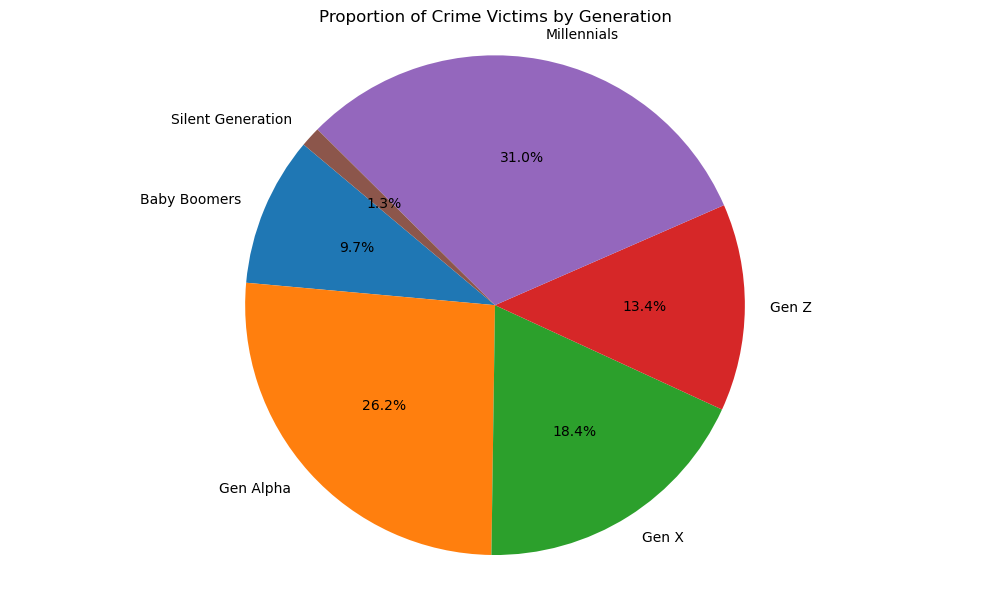

In [32]:
# sum the data to get total counts per generation
total_counts_per_generation = Gen_crime_count.groupby('Generation')['Crime Count'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(total_counts_per_generation['Crime Count'], labels=total_counts_per_generation['Generation'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Crime Victims by Generation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save and show the plot
plt.savefig('Victims_by_Generation_Pie_Chart.png')
plt.show()

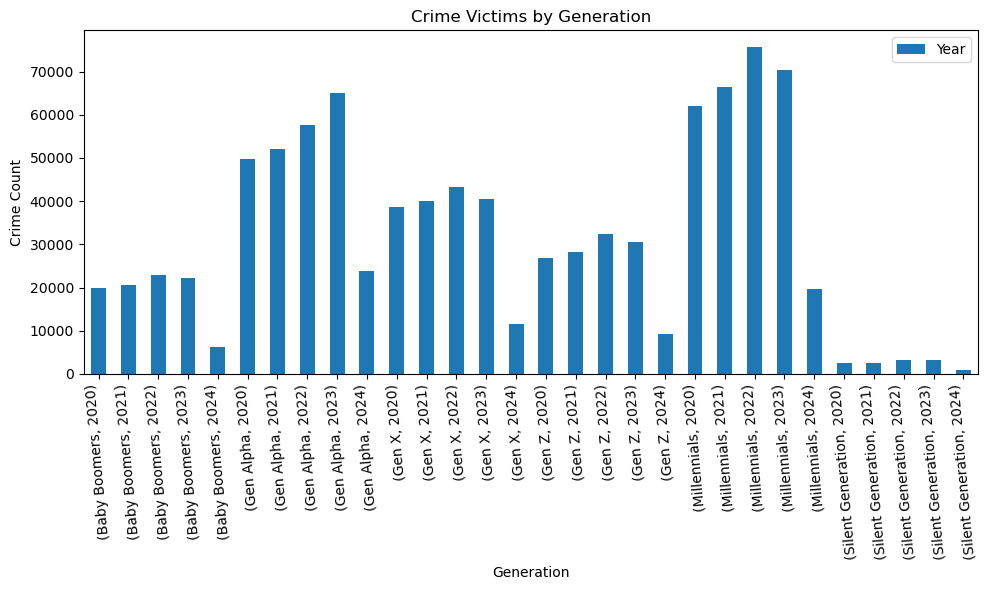

In [33]:
Vict_by_Cat = Vict_by_Gen_cat_merged_df.groupby('Generation').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

# Plotting the bar chart
Vict_by_Gen_cat_merged_df.plot(kind='bar', figsize=(10, 6))
plt.title('Crime Victims by Generation')
plt.xlabel('Generation')
plt.ylabel('Crime Count')
plt.xticks(rotation=95) 
plt.legend(['Year', 'Crime Count'])
plt.tight_layout() 

# Save the plot as an image
plt.savefig("CRIME VICTIMS BY GENEATION")
plt.show()
